In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from pathlib import Path
import statsmodels.api as sm



import numpy as np

if "root" not in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

sns.set_style('whitegrid')

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})

In [231]:
df = pd.read_csv('src/data/treated/tshirts.csv').drop(['Unnamed: 0'], axis=1, inplace=False)
df = df[df['cat']!='Undefined']

In [232]:
meanPrice = {'Fashion':90, 'UltraFastFashion':20, 'FastFashion':40, 'UltraFashion':150, 'Luxe': 250}

def computeReduction(row: pd.Series):
    return (meanPrice[row['cat']] - row.Prix)/meanPrice[row['cat']]

In [233]:
df['promo'] = df.apply(computeReduction, axis=1)

In [234]:
df.groupby(by='cat')['Prix'].median()

cat
Fashion              28.0
FastFashion          15.0
Luxe                121.0
UltraFashion         95.0
UltraFastFashion      4.5
Name: Prix, dtype: float64

In [215]:
df = df[df.promo>0]

cat
Fashion             AxesSubplot(0.125,0.125;0.775x0.755)
FastFashion         AxesSubplot(0.125,0.125;0.775x0.755)
Luxe                AxesSubplot(0.125,0.125;0.775x0.755)
UltraFashion        AxesSubplot(0.125,0.125;0.775x0.755)
UltraFastFashion    AxesSubplot(0.125,0.125;0.775x0.755)
Name: promo, dtype: object

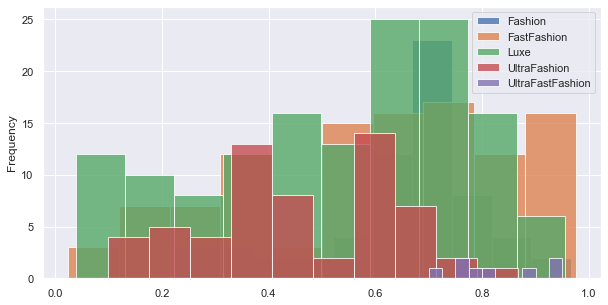

In [216]:
df.groupby(by=['cat']).promo.plot(alpha=0.8, legend=True,kind='hist')

In [217]:
df[df.cat == 'FastFashion'].promo.to_numpy()

array([0.875  , 0.825  , 0.575  , 0.375  , 0.825  , 0.75   , 0.375  ,
       0.925  , 0.75   , 0.9    , 0.675  , 0.7    , 0.925  , 0.8125 ,
       0.875  , 0.9125 , 0.75125, 0.75125, 0.7    , 0.3    , 0.75   ,
       0.375  , 0.375  , 0.75   , 0.95   , 0.5    , 0.125  , 0.25025,
       0.3    , 0.75   , 0.3    , 0.8    , 0.875  , 0.90025, 0.90025,
       0.90025, 0.1375 , 0.975  , 0.875  , 0.625  , 0.5    , 0.375  ,
       0.50025, 0.7    , 0.75   , 0.55   , 0.9625 , 0.7    , 0.125  ,
       0.67525, 0.45   , 0.2525 , 0.375  , 0.625  , 0.5    , 0.95   ,
       0.95   , 0.75   , 0.9125 , 0.6    , 0.625  , 0.675  , 0.875  ,
       0.875  , 0.25025, 0.675  , 0.675  , 0.5    , 0.425  , 0.5    ,
       0.625  , 0.1875 , 0.8625 , 0.50025, 0.05   , 0.75   , 0.7    ,
       0.7    , 0.675  , 0.125  , 0.1875 , 0.3275 , 0.9    , 0.975  ,
       0.025  , 0.9    , 0.625  , 0.675  , 0.675  , 0.375  , 0.75   ,
       0.825  , 0.375  , 0.375  , 0.5    , 0.5    , 0.325  , 0.45   ,
       0.125  , 0.6 

In [218]:
data = df[df.cat == 'Luxe'].promo.to_numpy()

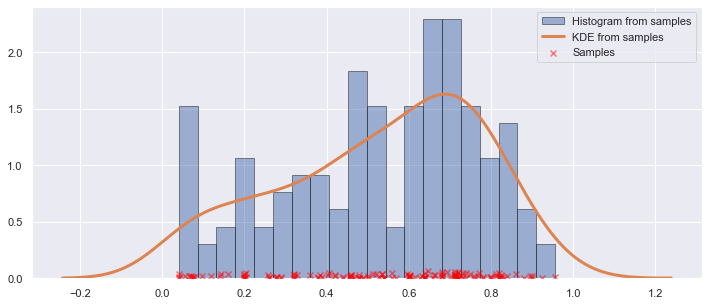

In [219]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()  
# Plot the histrogram
ax.hist(
    data,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)

# Plot the samples
ax.scatter(data,
    np.abs(np.random.randn(data.size)) / 40,
    marker="x",
    color="red",
    zorder=20,
    label="Samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.grid(True, zorder=-5)

In [220]:
df['IsLuxe'] = (df.cat == "Luxe").astype('int')
df['IsUFashion'] = (df.cat == "UltraFashion").astype('int')
#df['isFashion'] = (df.cat == "Fashion").astype('int')
df['IsFastFashion'] = (df.cat == "FastFashion").astype('int')
#df['IsUltraFastFashion'] =(df.cat == "UltraFastFashion" ).astype('int')



In [221]:
df = df.drop(['nom', 'Marque', 'Description', 'Date', 'cat'], axis=1)

In [222]:
df['etat']= 1*(df['État']=='NEUF AVEC ÉTIQUETTE') + 2*(df['État']=='NEUF SANS ÉTIQUETTE') + 3*(df['État']=='TRÈS BON ÉTAT') + 4*(df['État']=='BON ÉTAT') + 5*(df['État']=='SATISFAISANT')

In [223]:
X, y  = df.drop(['État','promo', 'Prix', 'keep'], axis=1), df.promo

In [224]:
cols = X.columns

In [225]:
import statsmodels.api as sm
exog =  sm.add_constant(X)

In [226]:
X

,IsLuxe,IsUFashion,IsFastFashion,etat
3,0,0,1,3
4,0,0,0,3
5,1,0,0,2
6,0,0,0,3
8,0,0,1,3
...,...,...,...,...
796,1,0,0,2
797,1,0,0,4
798,1,0,0,3
799,1,0,0,3


In [227]:
mod = sm.OLS(np.log(y.to_numpy()), exog=exog)
res = mod.fit()


In [228]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     10.78
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.76e-08
Time:                        18:18:40   Log-Likelihood:                -343.14
No. Observations:                 382   AIC:                             696.3
Df Residuals:                     377   BIC:                             716.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8619      0.120     -7.195      0.000      -1.097      -0.626
IsLuxe           -0.3518      0.087     -4.044      0.000      -0.523      -0.181
IsUFashion       -0.3585      0.106     -3.377      0.001      -0.567      -0.150
IsFastFashion    -0.1781      0.092     -1.931      0.054      -0.360       0.003
etat              0.1510      0.034      4.409      0.000       0.084       0.218
==============================================================================
Omnibus:                      165.027   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.711
Skew:                          -1.977   Prob(JB):                    5.36e-129
Kurtosis:                       7.635   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En moyenne, toutes choses prises égales par ailleurs, la promotion en %  faite à un vêtement de seconde main réduit de 35%  lorsqu’il est d’une Marque de Luxe, en supposant que le prix moyen d’un tee-shirt de luxe est de 200€. 